# Data Science Group Project: Healthcare - Persistency of a Drug

## Problem Description/Statement: 

In this assignment, the goal is to solve a problem for a pharmaceutical company called ABC Pharma. The problem they face is understanding how long patients continue taking a particular drug based on the physician's prescription. To address this challenge, ABC Pharma has approached an analytics company to automate the process of identifying factors that impact drug persistency.

Our goal will be to gather insights into these factors and build a classification model using data science techniques. The final goal is to predict the persistency of a drug based on various features. This information can help pharmaceutical companies understand the patterns and factors that influence patient adherence to drug prescriptions, enabling them to make informed decisions and take appropriate actions to improve persistency rates.

The project involves several tasks such as problem understanding, data understanding, data cleaning, feature engineering, model development, model selection, model evaluation, reporting accuracy, precision, recall, and ROC-AUC for both classes of the target variable. The final step is to deploy the developed model, making it accessible for prediction and decision-making.

In [1]:
# Import libraries needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

plt.style.use('classic')

In [2]:
# Import dataset:

df = pd.read_excel(r"C:\Users\Aya K\Desktop\Week 7 Group Project Data Science\Healthcare_dataset.xlsx")

# Display dataset:

df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


In [3]:
# From the overview of data, noticing that there is 'N' and 'Y' for most of the one-hot encoding categorical value, 
# it needs to change to 0 and 1 in the following step to get an accurate overview of the data

df = df.replace('N', 0)
df = df.replace('Y', 1)

# Change target variable from categorical to numerical to be able to compare it with other variables

df = df.replace('Non-Persistent', 0)
df = df.replace('Persistent', 1)

df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,1,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,1,0,0,0,0,0,0,1
3420,P3421,1,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
3421,P3422,1,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,0,0,1,0,0,0,0,0,0,1
3422,P3423,0,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Display information on dataset: data types, number of rows & cols, null values, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   int64 
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
# Double check and display number of rows and cols:

df.shape

(3424, 69)

In [6]:
# Display file size:

file_size = os.path.getsize(r"C:\Users\Aya K\Desktop\Week 7 Group Project Data Science\Healthcare_dataset.xlsx")
print("The size of your dataset file is",file_size, "bytes.")

The size of your dataset file is 908966 bytes.


In [7]:
# Check if there are any duplicate values:

duplicates = df.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [8]:
# Double check if there are any null values:

Null_Values = df.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


In [9]:
# Iterate over columns and print unique values:

for column in df.columns:
    unique_values = df[column].unique()
    print("The unique values in column",column,"are:",unique_values)


The unique values in column Ptid are: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
The unique values in column Persistency_Flag are: [1 0]
The unique values in column Gender are: ['Male' 'Female']
The unique values in column Race are: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
The unique values in column Ethnicity are: ['Not Hispanic' 'Hispanic' 'Unknown']
The unique values in column Region are: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
The unique values in column Age_Bucket are: ['>75' '55-65' '65-75' '<55']
The unique values in column Ntm_Speciality are: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Persistency_Flag,3424.0,0.376460,0.484568,0.0,0.0,0.0,1.0,1.0
Gluco_Record_Prior_Ntm,3424.0,0.235105,0.424126,0.0,0.0,0.0,0.0,1.0
Gluco_Record_During_Rx,3424.0,0.263435,0.440560,0.0,0.0,0.0,1.0,1.0
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Dexa_During_Rx,3424.0,0.273364,0.445751,0.0,0.0,0.0,1.0,1.0
Frag_Frac_Prior_Ntm,3424.0,0.161215,0.367783,0.0,0.0,0.0,0.0,1.0
Frag_Frac_During_Rx,3424.0,0.121787,0.327088,0.0,0.0,0.0,0.0,1.0
Idn_Indicator,3424.0,0.746787,0.434915,0.0,0.0,1.0,1.0,1.0
Injectable_Experience_During_Rx,3424.0,0.892523,0.309764,0.0,1.0,1.0,1.0,1.0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,3424.0,0.447722,0.497332,0.0,0.0,0.0,1.0,1.0


# Target Variable (Persistency_Flag) Analysis:

Text(0, 0.5, 'Count')

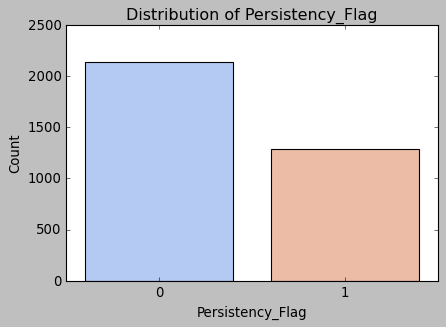

In [11]:
# Countplot for target variable

plt.figure(figsize=(6, 4))
sns.countplot(x='Persistency_Flag', data=df, palette='coolwarm').set(title='Distribution of Persistency_Flag')
plt.xlabel('Persistency_Flag')
plt.ylabel('Count')

## There is more non-persistency among the patients than there is persistency.
## ___________________________________________________________________

# Numerical Categories Analysis

In [12]:
# Correlation for numerical categories  

numerical = [col for col in df.columns if df[col].dtype == 'int64']
data_numerical = df[numerical]

corr = data_numerical.corr()

corr

,Persistency_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Persistency_Flag,1.000000,-0.005758,0.212704,0.335235,0.491823,0.000318,0.106935,0.111440,0.098360,0.322320,...,-0.003492,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082210
Gluco_Record_Prior_Ntm,-0.005758,1.000000,0.375134,-0.002280,-0.006271,0.067839,0.069412,0.075762,0.054521,-0.026891,...,-0.002628,0.000786,0.051522,0.029516,-0.013684,-0.020429,-0.007134,-0.003146,-0.001089,0.115888
Gluco_Record_During_Rx,0.212704,0.375134,1.000000,0.074775,0.118155,0.065961,0.111802,0.143928,0.126182,0.085540,...,-0.020173,-0.012434,0.055776,0.032912,-0.007899,-0.001200,-0.010519,-0.007149,0.008602,0.132623
Dexa_Freq_During_Rx,0.335235,-0.002280,0.074775,1.000000,0.604437,0.068839,0.073251,-0.027497,-0.006385,0.209753,...,0.002493,-0.007395,-0.006345,-0.011560,-0.039157,0.000614,0.013845,-0.017566,0.000994,0.013964
Dexa_During_Rx,0.491823,-0.006271,0.118155,0.604437,1.000000,0.051861,0.094189,0.037684,0.047813,0.274016,...,0.025990,0.003088,0.053493,-0.009929,-0.034610,-0.009266,0.011499,-0.018763,0.019296,0.069938
Frag_Frac_Prior_Ntm,0.000318,0.067839,0.065961,0.068839,0.051861,1.000000,0.409865,0.030635,0.029046,-0.014602,...,0.018909,-0.005563,0.062411,0.031230,0.052745,-0.029997,-0.010854,0.046585,0.050168,0.094169
Frag_Frac_During_Rx,0.106935,0.069412,0.111802,0.073251,0.094189,0.409865,1.000000,0.060766,0.051375,0.027477,...,-0.004669,-0.000934,0.080015,0.021802,0.056997,-0.018468,-0.005360,-0.023861,0.092765,0.108602
Idn_Indicator,0.111440,0.075762,0.143928,-0.027497,0.037684,0.030635,0.060766,1.000000,0.275004,0.044808,...,-0.084177,-0.081549,0.054127,-0.039069,-0.019564,0.041366,-0.026285,0.026786,0.040491,0.038426
Injectable_Experience_During_Rx,0.098360,0.054521,0.126182,-0.006385,0.047813,0.029046,0.051375,0.275004,1.000000,0.050749,...,-0.020104,-0.004163,0.041214,0.019000,0.021792,0.006083,-0.030290,0.022235,0.016212,0.046626
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.322320,-0.026891,0.085540,0.209753,0.274016,-0.014602,0.027477,0.044808,0.050749,1.000000,...,0.028247,0.001044,0.013554,-0.015222,-0.021191,0.018022,0.000779,-0.030080,-0.032990,0.025144


[Text(0.5, 1.0, 'Numerical Correlation')]

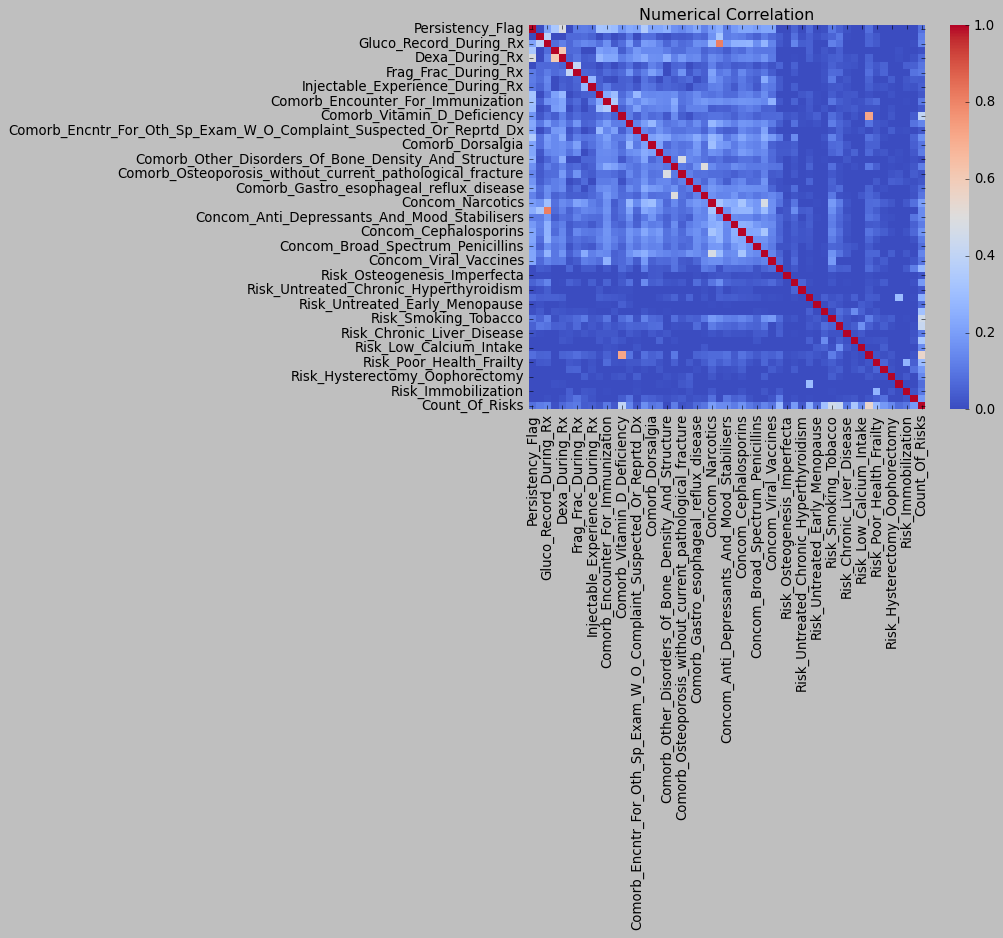

In [13]:
sns.heatmap(corr, cmap = 'coolwarm', vmin = 0, vmax = 1).set(title='Numerical Correlation')
 

# According to the correlation graph and table above, there is: 
## High corr between: 
Concom_Systemic_Corticosteroids_Plain Vs. Gluco_Record_During_Rx

## Somewhat high:
Risk_Vitamin_D_Insufficiency Vs. Comorb_Vitamin_D_Deficiency

Dexa_Freq_During_Rx Vs. Dexa_During_Rx

## _____________________________________________________________________

# Based on the Correlation Analysis above, let's conduct an outlier detection using the variables that seem to have some relationship with the target variable, (Persistency_Flag)

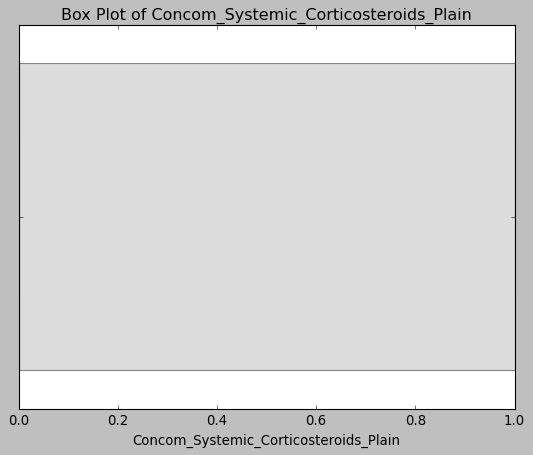

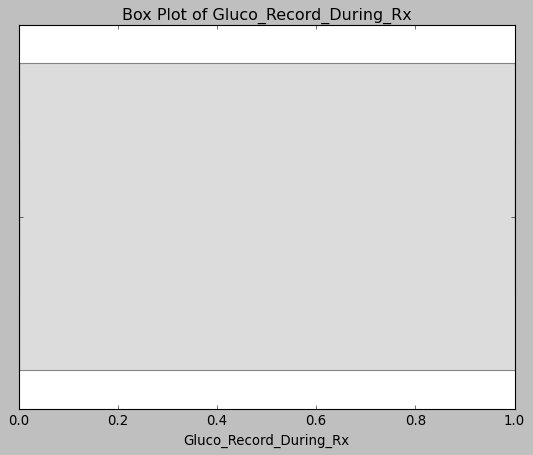

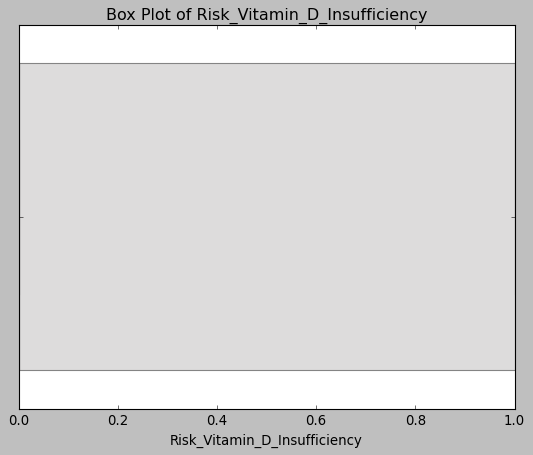

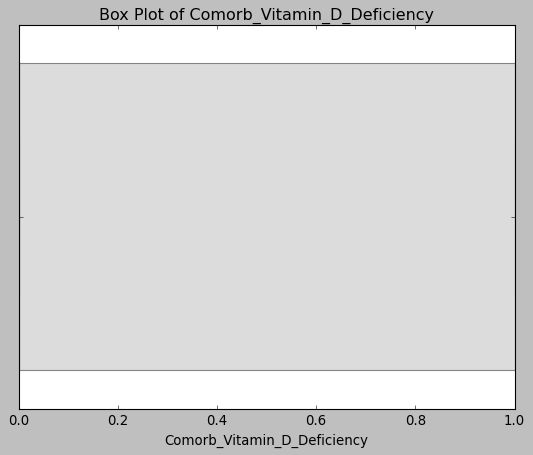

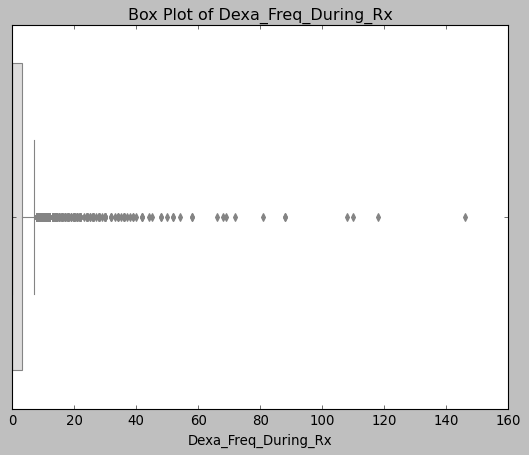

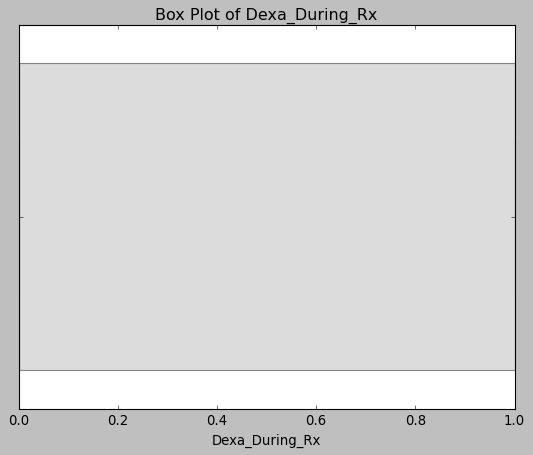

In [14]:
numerical_data = ['Concom_Systemic_Corticosteroids_Plain', 'Gluco_Record_During_Rx', 'Risk_Vitamin_D_Insufficiency', 'Comorb_Vitamin_D_Deficiency', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx']

for variable in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=variable,data=df,palette='coolwarm').set(title = "Box Plot of "+variable)

# Categorical Variables Analysis: 

## Patient Demographics:

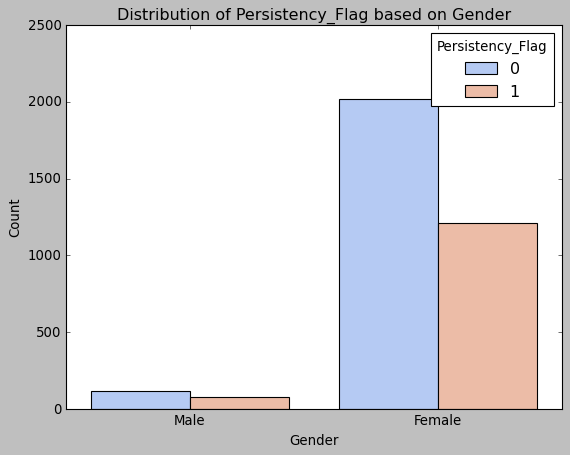

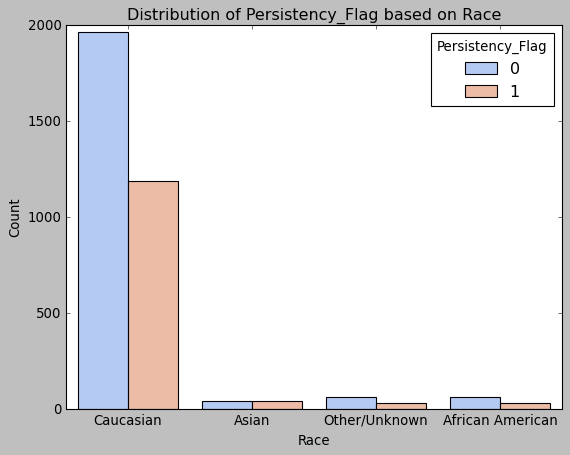

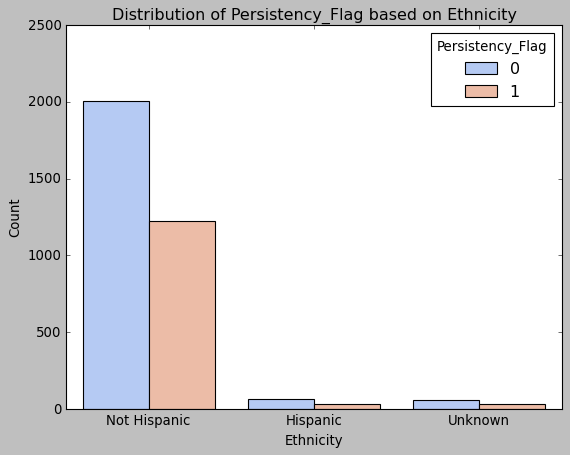

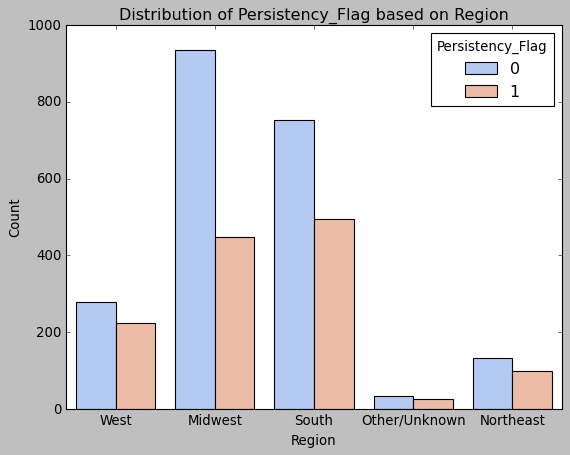

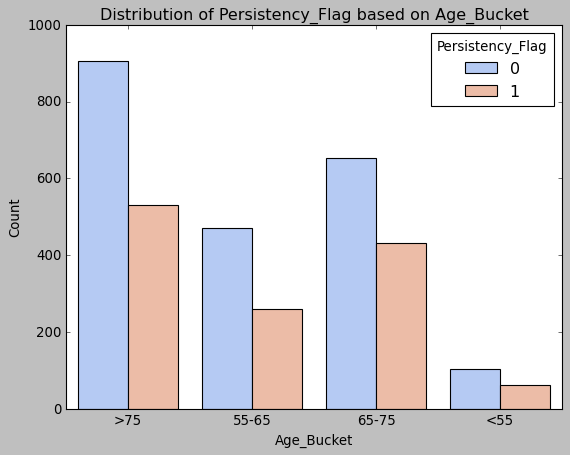

In [15]:
demo_categorical_data = ['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket']

# Plotting bar plots for each categorical feature
for variable in demo_categorical_data:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, data=df, hue='Persistency_Flag', palette='coolwarm').set(xlabel = variable, ylabel='Count')
    plt.title('Distribution of Persistency_Flag based on ' + variable)
    plt.legend(title='Persistency_Flag')
  


# Based on the graphs above: 

## 1) There is higher persistency and non-persistency counts in Females than in Males with non-persistency being higher.

## 2) There is higher persistency and non-persistency counts in Caucasians among all other races with non-persistency being higher.

## 3) There is higher persistency and non-persistency counts in Non-Hispanic people among all other ethnicities with non-persistency being higher.

## 4) The highest persistency counts in order among regions is in the South, Midwest, and West regions. And the highest non-persistency counts in order is in the Midwest, South, and West regions. 

## 5) The highest persistency and non-persistency counts in order are among patients of the following age groups: >75, 65-75, and 55-65.

## _____________________________________________________________________


## Physician/Provider Analysis: 

## FYI: NTM Rx is the medication prescribed by the physician.

Ntm_Speciality: Physician Speciality: Check for unique values above.

Ntm_Specialist_Flag: If physcian is a specialist or not.

Ntm_Speciality_Bucket: has 3 seperate groups:

1) OB/GYN/Others/PCP/Unknown = Obstetrics and Gynecology, other specialties, Primary Care Physicians, and those of unknown speciality.

2) Endo/Onc/Uro: Endocrinology, Oncology, and Urology

3) Rheu: Rheumatology 

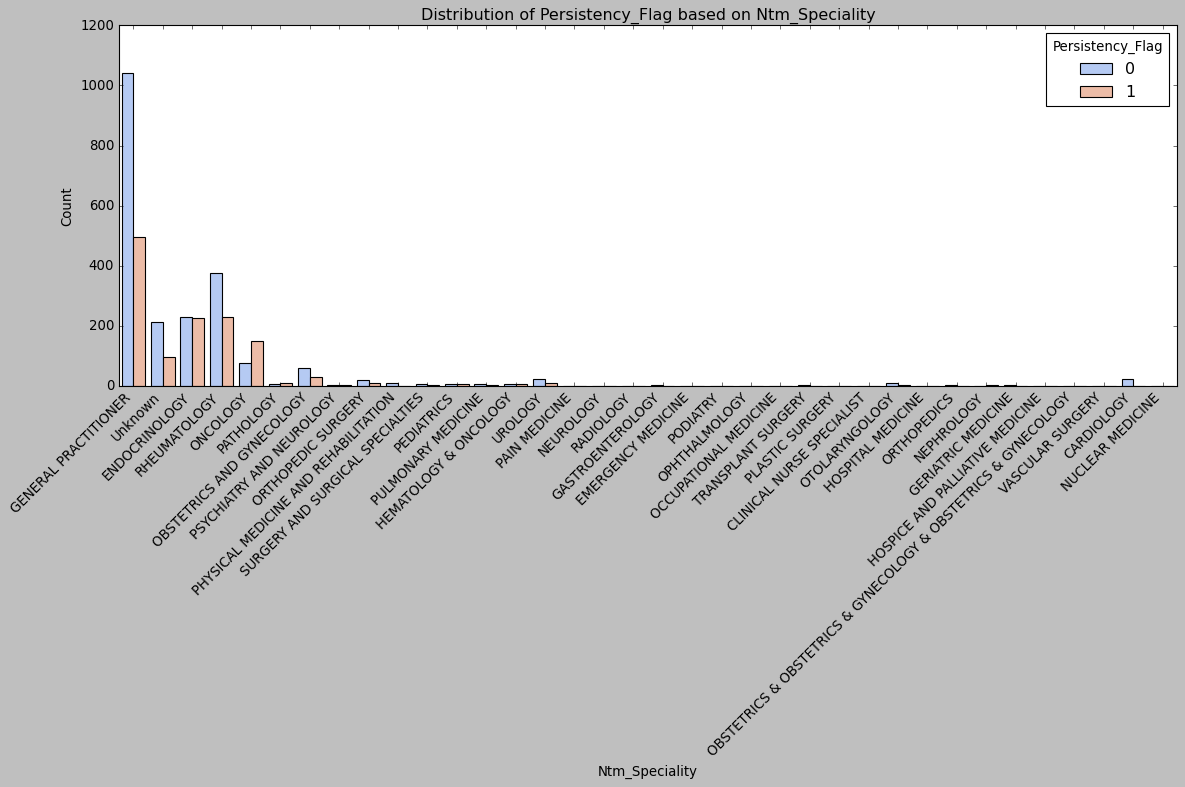

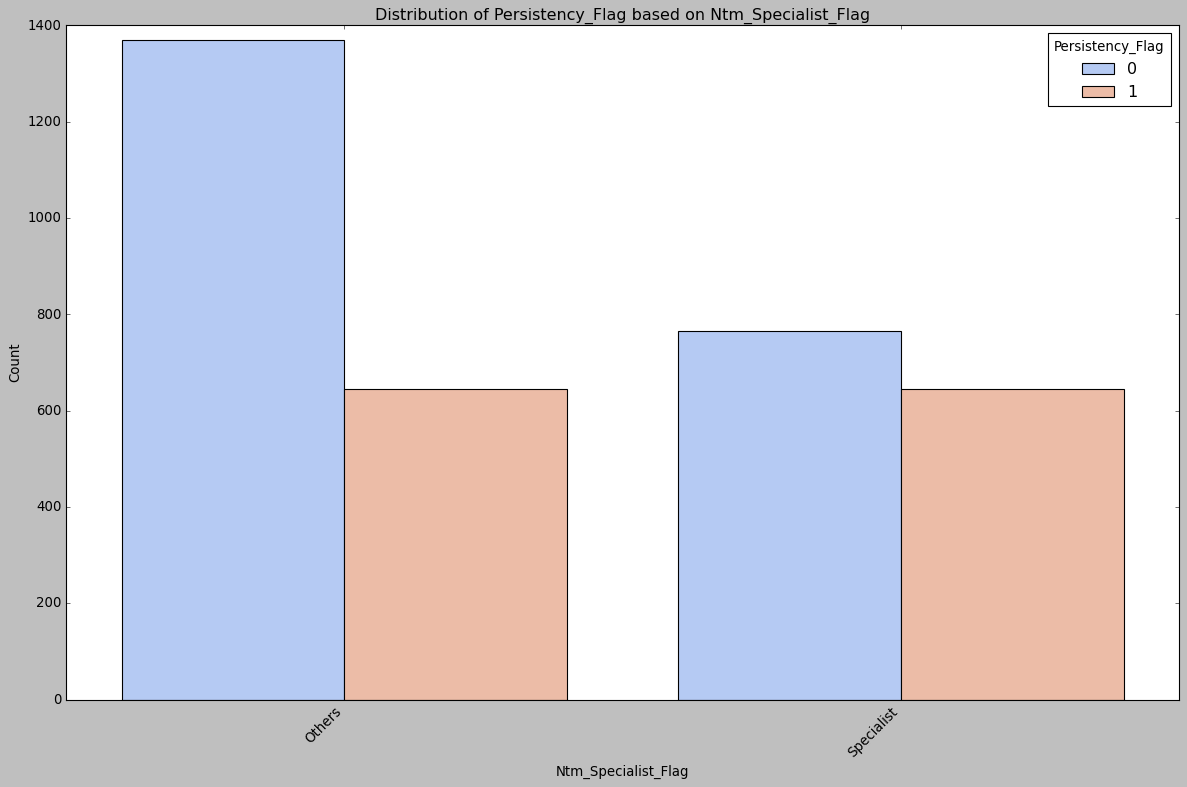

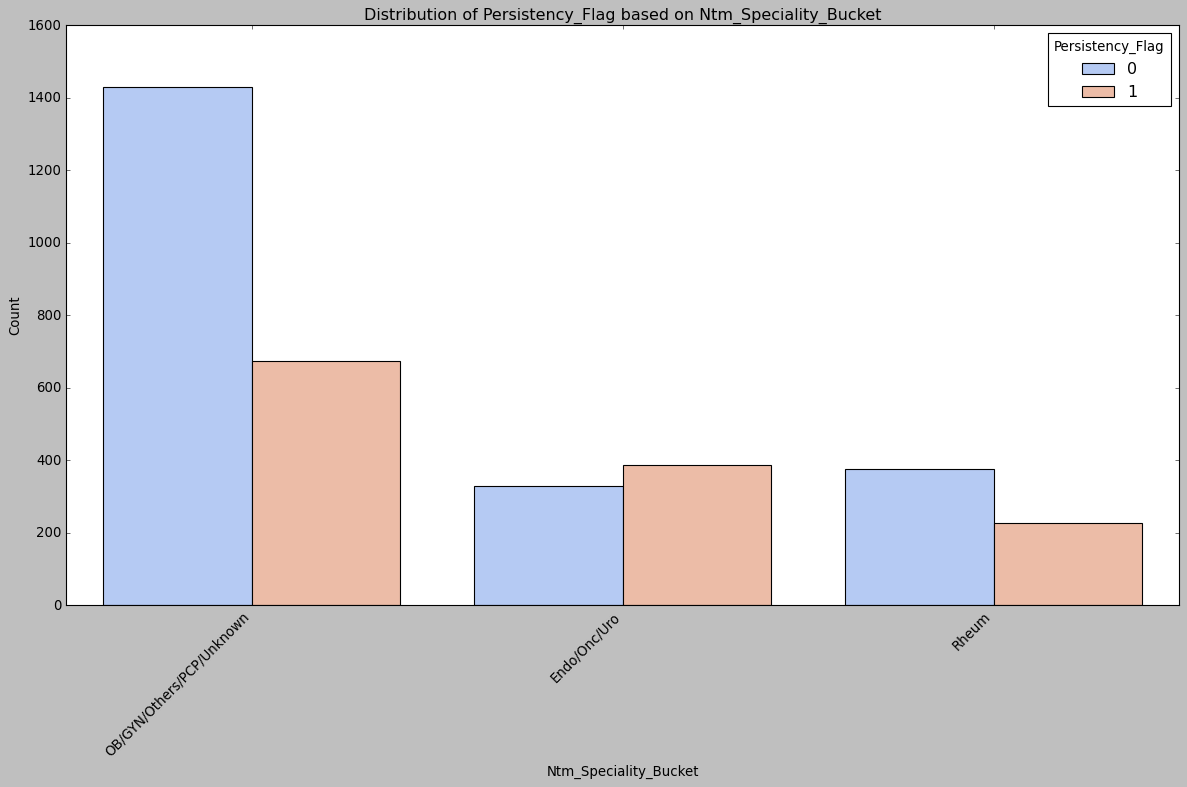

In [16]:
phys_categorical_data = ['Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket']

# Plotting bar plots for each categorical feature
for variable in phys_categorical_data:
    plt.figure(figsize=(15, 10))
    sns.countplot(x=variable, data=df, hue='Persistency_Flag', palette='coolwarm').set(xlabel = variable, ylabel='Count')
    plt.title('Distribution of Persistency_Flag based on ' + variable)
    plt.xticks(rotation=45, ha='right')  # Rotate and align x-labels for better readability
    plt.tight_layout()  # To avoid cropping the labels
    

# According to the graphs above:

## 1) The highest non-persistency and persistency counts among patients occured with those whose providers are general practiotioners and rheumatologists with endocrinologists and uknown specialities coming next.

## 2) The highest non-persistency and persistency counts also occured among patients whose providers' flag was categorized as non-specialists.

## 3) The highest non-persistency and persistency counts also occured among patients whose providers' bucket was categorized as  OB/GYN/Others/PCP/Unknown.

# Based on this information, it's hard to detect what speciality led to the most non-persistency. However, generally, those who were general practitioners or non-specialists had higher non-persistency patient counts.

## _________________________________________________________________________

## Risk Factors and Change, Adherance to Therapy, & T-score Change Analysis:

Risk_Segment_Prior_Ntm & Risk_Segment_During_Rx: The risk segment of patients before they started their treatment (prior to receiving the NTM medication) with VLR_LR and HR_VHR respresenting Very Low Risk/Low Risk and Very High Risk/High Risk respectively.

Change_Risk_Segment: If there was any change in Risk Segment.

Change_T_Score: The T-score is a measurement used to assess bone density in the context of osteoporosis. This value indicates the change in the patient's bone density relative to that of a healthy adult.                                             

Adherent_Flag: Adherence status of patients to their prescribed therapies and whether or not they follow the prescribed medication.


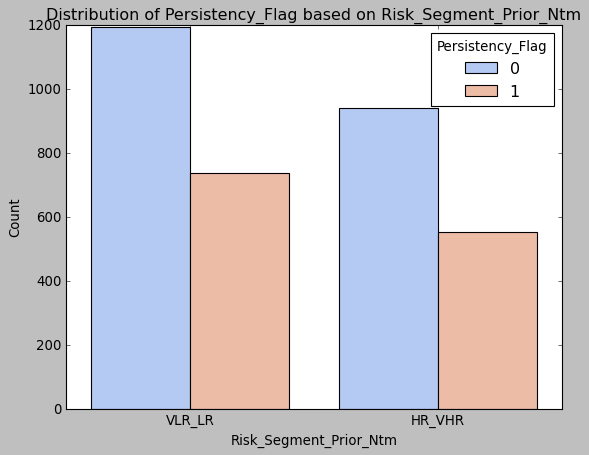

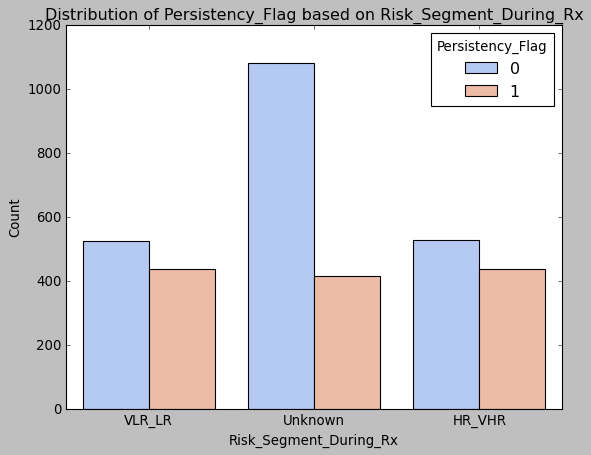

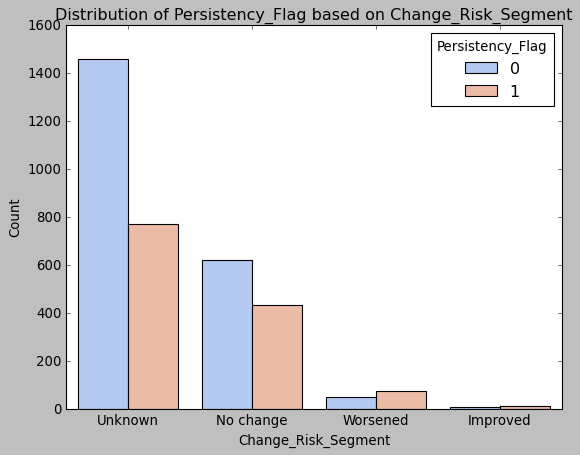

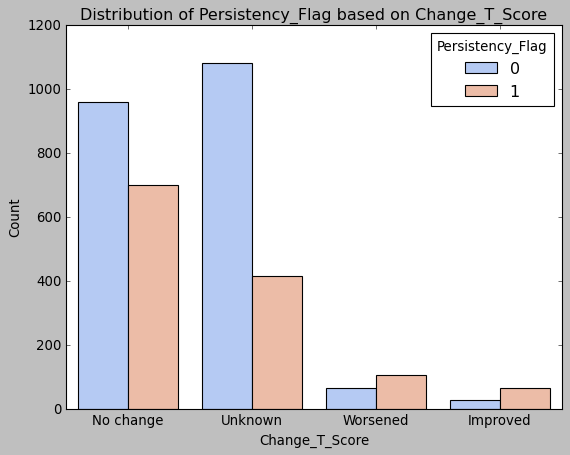

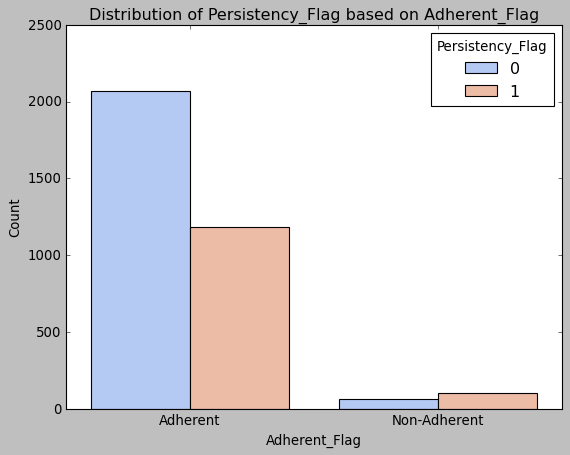

In [17]:
otherfactors_categorical_data = ['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx', 'Change_Risk_Segment', 'Change_T_Score', 'Adherent_Flag']


# Plotting bar plots for each categorical feature
for variable in otherfactors_categorical_data:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=variable, data=df, hue='Persistency_Flag', palette='coolwarm').set(xlabel = variable, ylabel='Count')
    plt.title('Distribution of Persistency_Flag based on ' + variable)


# According to graphs above: 

## 1) There is higher non-persistency counts among patients who have low risk factors prior to taking their medication.

## 2) There is higher non-persistency counts among patients who have low risk and unknown factors during taking their medication.

## 3) Both the change in risk segment and the change in T-score are mostly either unknown or had no change with the count being higher for patients who were non-persistent.

## 4) Although many patients were adherant to their medication, there was still higher non-persistency.

## ____________________________________________________________________________